### Smartphone Battery Life Prediction using Linear Regression

#### In this notebook, we'll build a linear regression model to predict smartphone battery life
#### based on various specifications like screen size, battery capacity, processor speed, etc.

In [ ]:
%pip install -q scikit-learn

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Set random seed for reproducibility
np.random.seed(42)
# Generate 100 smartphone samples
n_samples = 100

In [4]:
# Generate features
screen_size = np.random.choice(np.arange(4, 8.1, 0.2), size=n_samples)  # Screen size in inches


In [5]:
# Generate target variable (battery life) with some noise
# We'll assume battery life is positively correlated with battery capacity
# and negatively correlated with screen size and processor speed
battery_life = (
    16  # Base battery life
    - (screen_size - 6.0) * 2  # Each inch difference from 6.0 adds/removes 2 hours
    + np.random.normal(0, 0.5, n_samples)  # Add small random variations
)
#battery_life is y(x,w)

In [6]:
# Create a DataFrame
data = pd.DataFrame({
    'screen_size': screen_size,
    'battery_life': battery_life
})

In [7]:
# Display first few rows of our dataset
print("First few rows of our dataset:")
print(data.head())

First few rows of our dataset:
   screen_size  battery_life
0          5.2     17.151832
1          7.8     12.344006
2          6.8     15.134471
3          6.0     15.438051
4          5.4     17.675003


Text(0.5, 1.0, 'Screen Size vs Battery Life')

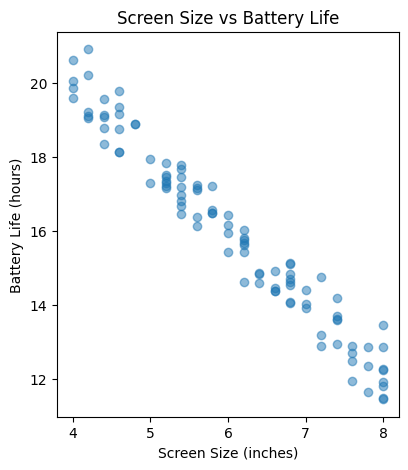

In [8]:
# Visualize relationships between features and target
plt.figure(figsize=(15, 5))
# Plot 1: Screen Size vs Battery Life
plt.subplot(131)
plt.scatter(data['screen_size'], data['battery_life'], alpha=0.5)
plt.xlabel('Screen Size (inches)')
plt.ylabel('Battery Life (hours)')
plt.title('Screen Size vs Battery Life')


# Modelli con Caratteristiche Multiple

Sebbene l'esempio nella sezione precedente utilizzi una sola caratteristica, un modello più sofisticato potrebbe basarsi su più caratteristiche, ciascuna con un peso diverso ($w_1$, $w_2$) e così via.

Per esempio, un modello basato su caratteristiche multiple potrebbe essere scritto come:

$$y(x,w) = w_0 + w_1x_1 + w_2x_2 + w_3x_3$$

Ad esempio, un modello che prevede la durata della batteria di uno smartphone potrebbe utilizzare queste caratteristiche:
* Dimensione dello schermo → $x_1$
* Capacità della batteria → $x_2$
* Velocità del processore → $x_3$

Questo modello sarebbe scritto come:

$\hat{y} = w_0 + w_1 \cdot \text{dimensione\_schermo} + w_2 \cdot \text{capacità\_batteria} + w_3 \cdot \text{velocità\_processore}$

dove:
* $\hat{y}$ è la durata della batteria prevista
* $w_0$ è il bias del modello
* $w_1, w_2, w_3$ sono i pesi associati a ciascuna caratteristica
* $\text{dimensione\_schermo}, \text{capacità\_batteria}, \text{velocità\_processore}$ sono le caratteristiche di input

Questi pesi vengono appresi durante l'addestramento per minimizzare l'errore nella previsione della durata della batteria.

In [9]:
battery_capacity = np.random.uniform(3000, 5000, n_samples)  # Battery capacity in mAh
processor_speed = np.random.uniform(1.8, 3.2, n_samples)  # Processor speed in GHz

In [10]:
# Generate target variable (battery life) with some noise
# We'll assume battery life is positively correlated with battery capacity
# and negatively correlated with screen size and processor speed
battery_life = (
    16  # Base battery life
    + (battery_capacity - 4000) * 0.003  # Each 1000mAh adds/removes ~3 hours
    - (screen_size - 6.0) * 2  # Each inch difference from 6.0 adds/removes 2 hours
    - (processor_speed - 2.5) * 3  # Each GHz difference from 2.5 adds/removes 3 hours
    + np.random.normal(0, 0.5, n_samples)  # Add small random variations
)

In [11]:
# Create a DataFrame
data = pd.DataFrame({
    'screen_size': screen_size,
    'battery_capacity': battery_capacity,
    'processor_speed': processor_speed,
    'battery_life': battery_life
})

In [12]:
# Display first few rows of our dataset
print("First few rows of our dataset:")
print(data.head())

First few rows of our dataset:
   screen_size  battery_capacity  processor_speed  battery_life
0          5.2       4400.715660         2.959017     16.658065
1          7.8       4693.322284         2.180160     15.621021
2          6.8       4712.648584         3.151353     15.156074
3          6.0       3809.016254         2.440171     16.035467
4          5.4       4775.540198         2.978832     17.776695


Text(0.5, 1.0, 'Screen Size vs Battery Life')

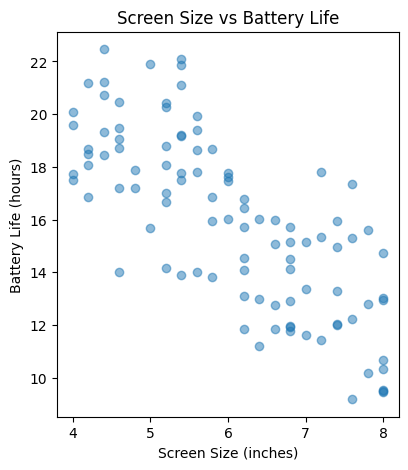

In [13]:
# Visualize relationships between features and target
plt.figure(figsize=(15, 5))
# Plot 1: Screen Size vs Battery Life
plt.subplot(131)
plt.scatter(data['screen_size'], data['battery_life'], alpha=0.5)
plt.xlabel('Screen Size (inches)')
plt.ylabel('Battery Life (hours)')
plt.title('Screen Size vs Battery Life')

Text(0.5, 1.0, 'Battery Capacity vs Battery Life')

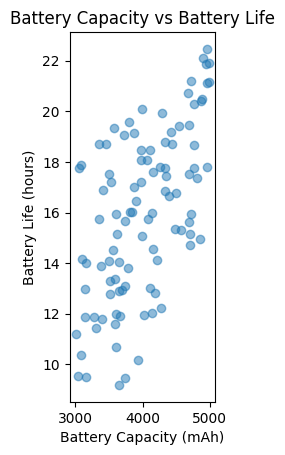

In [16]:
# Plot 2: Battery Capacity vs Battery Life
plt.subplot(132)
plt.scatter(data['battery_capacity'], data['battery_life'], alpha=0.5)
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Battery Life (hours)')
plt.title('Battery Capacity vs Battery Life')

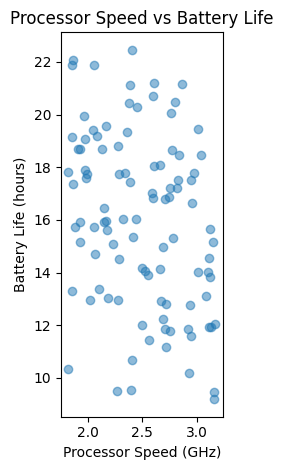

In [14]:
# Plot 3: Processor Speed vs Battery Life
plt.subplot(133)
plt.scatter(data['processor_speed'], data['battery_life'], alpha=0.5)
plt.xlabel('Processor Speed (GHz)')
plt.ylabel('Battery Life (hours)')
plt.title('Processor Speed vs Battery Life')

plt.tight_layout()
plt.show()


In [15]:
# Prepare features (X) and target (y)
X = data[['screen_size', 'battery_capacity', 'processor_speed']]
y = data['battery_life']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Print model performance metrics
print("\nModel Performance Metrics:")
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Model Performance Metrics:
Root Mean Squared Error: 0.4949118453337992


In [20]:
# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
screen_size: -2.0225
battery_capacity: 0.0031
processor_speed: -2.7179
Intercept: 22.6554


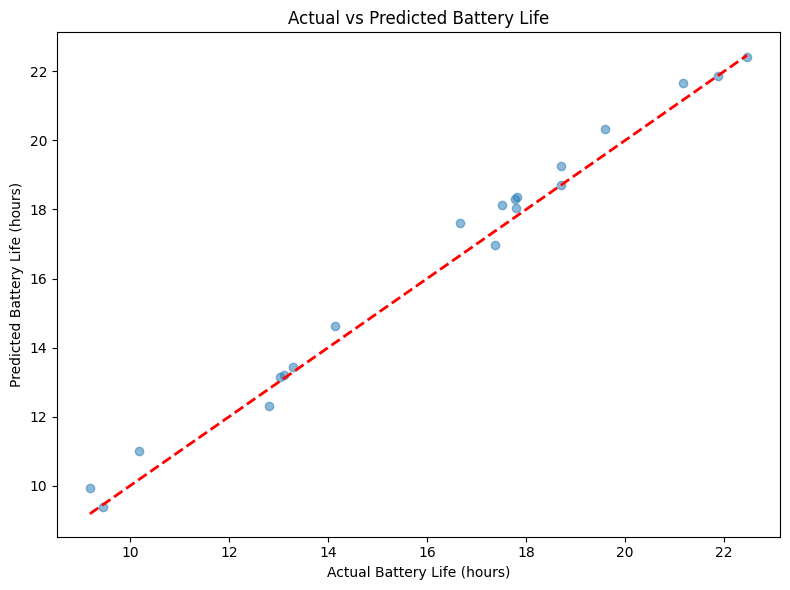

In [21]:
# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Battery Life (hours)')
plt.ylabel('Predicted Battery Life (hours)')
plt.title('Actual vs Predicted Battery Life')
plt.tight_layout()
plt.show()

In [22]:
# Pesi reali utilizzati per generare i dati
real_weights = {
    'screen_size': -2.0,  # Ogni pollice di differenza da 6.0 aggiunge/rimuove 2 ore
    'battery_capacity': 0.003,  # Ogni 1000mAh aggiunge/rimuove ~3 ore
    'processor_speed': -3.0  # Ogni GHz di differenza da 2.5 aggiunge/rimuove 3 ore
}

# Pesi trovati dal modello
model_weights = dict(zip(X.columns, model.coef_))

# Confronto fra pesi reali e pesi trovati
print("Confronto fra pesi reali e pesi trovati:")
for feature in real_weights:
    print(f"{feature}:")
    print(f"  Peso reale: {real_weights[feature]:.4f}")
    print(f"  Peso trovato: {model_weights[feature]:.4f}")

Confronto fra pesi reali e pesi trovati:
screen_size:
  Peso reale: -2.0000
  Peso trovato: -2.0225
battery_capacity:
  Peso reale: 0.0030
  Peso trovato: 0.0031
processor_speed:
  Peso reale: -3.0000
  Peso trovato: -2.7179
